In [1]:
# Imports 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('./../Cuadernos/Cuadernos/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Descripcion de los datos 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Seleccion de Variables

In [14]:
Data = df.loc[:,["Age","EstimatedSalary"]].values
Target = df.loc[:,"Purchased"].values

# Divicion de dataset

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_traing,Y_test = train_test_split(Data,Target,test_size=0.3,random_state=42)

# Escalado de Datos

debido a que SPV se vale de separar datos mediante el uso de un hiperplano debemos escalar los datos, para evitar que las diferencias de escalas nos prevengan de la posibilidad de encontrar un hiperplano divisor 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Entrenamiento del Modelo

In [17]:
from sklearn.svm import SVC
#Definimos los hyperparametros del clasificador
#Definimos el tipo de kerner (esto define que tipo de operacion se va a realizar sobre los datos para encontrar el hiperplano "kernel Trick")
#Definimos el random state para poder reproducir resultados
#Definimos C para poder controlar el grado de regularizacion del algoritmo
Classifier = SVC(kernel='linear', random_state=42, C=1)
Classifier.fit(X_train,Y_traing)

SVC(C=1, kernel='linear', random_state=42)

# Realizamos Predicciones 

In [18]:
predicciones = Classifier.predict(X_test)

# Evaluamos al modelos

              precision    recall  f1-score   support

           0       0.80      0.99      0.88        73
           1       0.97      0.62      0.75        47

    accuracy                           0.84       120
   macro avg       0.88      0.80      0.82       120
weighted avg       0.87      0.84      0.83       120
 



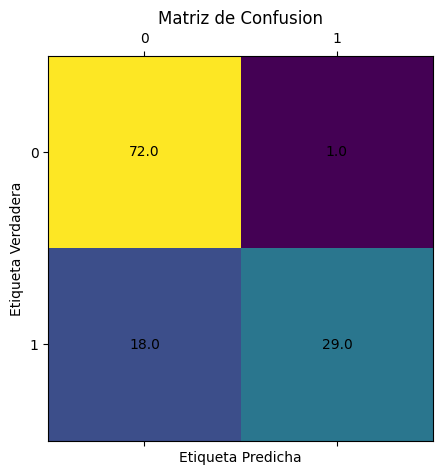

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_pred=predicciones,y_true=Y_test),"\n")
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicciones)
fig,ax = plt.subplots(figsize=(10,5))

ax.matshow(conf_mat)
plt.title("Matriz de Confusion")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


In [21]:
np.ndenumerate(conf_mat)

In [37]:
#Kernel polinomico
#en este caso necesito pasarle el gradod el polinomio
Classifier_poly = SVC(kernel='poly', random_state=42, degree=3, gamma = 'auto', C=1)
Classifier_poly.fit(X_train,Y_traing)
#Kernel Gaussiano
Classifier_gaus = SVC(kernel='rbf', random_state=42, gamma = 'auto', C=1)
Classifier_gaus.fit(X_train,Y_traing)
#Kernel Sigmoide
Classifier_sig = SVC(kernel='sigmoid',gamma = 'auto', random_state=42, C=1)
Classifier_sig.fit(X_train,Y_traing)

# NOTA: el parametro gamma solo se utiliza para kkernels polinomicos gaussianos o sigmoides y se encarga de determinar el peso que cada datos tiene a la hora de entrenar (mas bajo mas peso mas alto menos peso)

SVC(C=1, gamma='auto', kernel='sigmoid', random_state=42)

In [39]:
predicciones_poly = Classifier_poly.predict(X_test) 
predicciones_gaus = Classifier_gaus.predict(X_test) 
predicciones_sig = Classifier_sig.predict(X_test) 

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        73
           1       1.00      0.53      0.69        47

    accuracy                           0.82       120
   macro avg       0.88      0.77      0.78       120
weighted avg       0.86      0.82      0.80       120
 



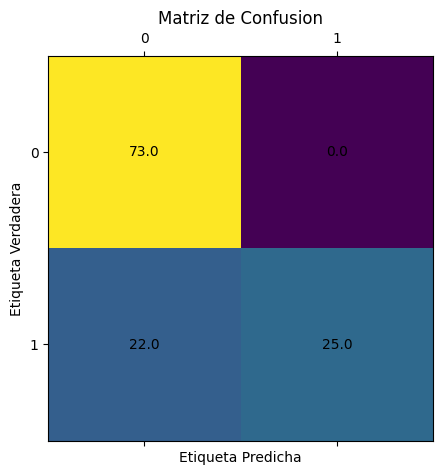

In [40]:
print(classification_report(y_pred=predicciones_poly,y_true=Y_test),"\n")
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicciones_poly)
fig,ax = plt.subplots(figsize=(10,5))

ax.matshow(conf_mat)
plt.title("Matriz de Confusion")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        73
           1       0.92      0.98      0.95        47

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120
 



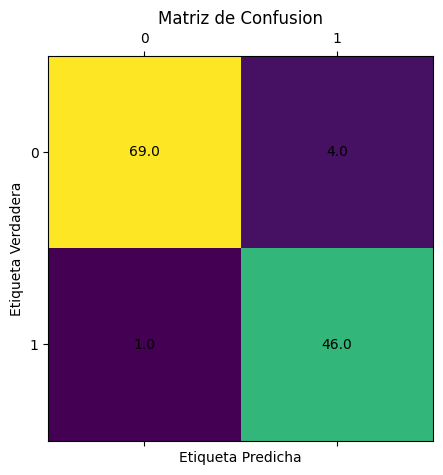

In [41]:
print(classification_report(y_pred=predicciones_gaus,y_true=Y_test),"\n")
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicciones_gaus)
fig,ax = plt.subplots(figsize=(10,5))

ax.matshow(conf_mat)
plt.title("Matriz de Confusion")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        73
           1       0.62      0.49      0.55        47

    accuracy                           0.68       120
   macro avg       0.67      0.65      0.65       120
weighted avg       0.68      0.68      0.67       120
 



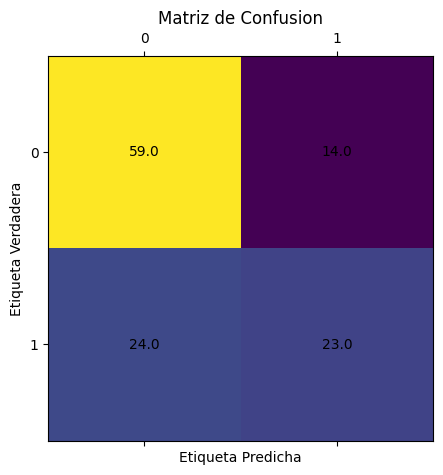

In [42]:
print(classification_report(y_pred=predicciones_sig,y_true=Y_test),"\n")
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predicciones_sig)
fig,ax = plt.subplots(figsize=(10,5))

ax.matshow(conf_mat)
plt.title("Matriz de Confusion")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')